Adapted by: Frank Greco
<br>
From here: https://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac
<br>
Posted by: aneesh joshi

In [1]:
%load_ext autoreload
%autoreload 2
#%reload_ext autoreload
import sys
sys.path.append('/Users/fjgreco/Dev-Atlas')

In [2]:
import numpy as np
import tensorflow as tf


In [3]:
from preprocess import ParsedTranscript
pt=ParsedTranscript('Copy of 001 ENLEAYA001.srt.txt', '../../CC_TRANSCRIPTS3')

pt.read_file()

pt.print_parms()


fullpath: ../../CC_TRANSCRIPTS3/Copy of 001 ENLEAYA001.srt.txt
len raw_transcript: 142
vocab_size: 398
word2int['us']: 367
int2word[2]: hilda
len(sentences: 522
sentences[0:20]: ['okay', ' i can see two  in here', 'can you read the article first', ' please', 'yes', 'loudly', 'the president of the republic should be an egyptian born to egyptian parents and enjoy salient political rights', ' his age must not be less than 40 gregorian years', 'mm-hmm', 'i agree with the president', ' um', 'mm-hmm', 'he should be egyptian born to egyptian parents', ' because it will have', ' make him have well-rounded perspectives', ' and it may lead him to having interests to other countries', ' and so', 'it would make him have interest', ' or will not make him', ' prevent him']


In [4]:
data = []

sentences=pt.get_tokenized_sentences()

WINDOW_SIZE = 2

for sentence in sentences:
   
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            word=word.replace(",", "")
            word=word.replace(".", "")
            word=word.replace("?", "")
            word=word.replace("!", "")
            
            nb_word=nb_word.replace(",", "")
            nb_word=nb_word.replace(".", "")
            nb_word=nb_word.replace("?", "")
            nb_word=nb_word.replace("!", "")
            
            if nb_word != word:
                data.append([word, nb_word])
            #else:
                #print word, nb_word

In [5]:
print(data[0:20])
print len(data)

[['i', 'can'], ['i', 'see'], ['can', 'i'], ['can', 'see'], ['can', 'two'], ['see', 'i'], ['see', 'can'], ['see', 'two'], ['see', 'in'], ['two', 'can'], ['two', 'see'], ['two', 'in'], ['two', 'here'], ['in', 'see'], ['in', 'two'], ['in', 'here'], ['here', 'two'], ['here', 'in'], ['can', 'you'], ['can', 'read']]
5498


In [6]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp



In [7]:
x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(pt.get_word2int(data_word[0]), pt.vocab_size))
    y_train.append(to_one_hot(pt.get_word2int(data_word[1]), pt.vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [8]:
print(x_train.shape, y_train.shape)
print(x_train)

((5498, 398), (5498, 398))
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
# making placeholders for x_train and y_train

x = tf.placeholder(tf.float32, shape=(None, pt.vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, pt.vocab_size))

In [10]:
EMBEDDING_DIM = 5 # you can choose your own number

W1 = tf.Variable(tf.random_normal([pt.vocab_size, EMBEDDING_DIM]))

b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias

hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [11]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, pt.vocab_size]))

b2 = tf.Variable(tf.random_normal([pt.vocab_size]))

prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [12]:
print (len(x_train))

5498


In [13]:
sess = tf.Session()

init = tf.global_variables_initializer()

sess.run(init) #make sure you do this!

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

#n_iters = 10000
n_iters = 100

# train for n_iter iterations

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})

    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

('loss is : ', 10.152681)
('loss is : ', 9.925729)
('loss is : ', 9.730372)
('loss is : ', 9.561793)
('loss is : ', 9.416047)
('loss is : ', 9.289875)
('loss is : ', 9.18052)
('loss is : ', 9.085632)
('loss is : ', 9.003199)
('loss is : ', 8.931498)
('loss is : ', 8.869034)
('loss is : ', 8.814536)
('loss is : ', 8.766878)
('loss is : ', 8.725103)
('loss is : ', 8.688401)
('loss is : ', 8.65605)
('loss is : ', 8.627433)
('loss is : ', 8.602018)
('loss is : ', 8.579361)
('loss is : ', 8.559053)
('loss is : ', 8.540783)
('loss is : ', 8.524241)
('loss is : ', 8.509183)
('loss is : ', 8.495407)
('loss is : ', 8.482728)
('loss is : ', 8.470987)
('loss is : ', 8.460045)
('loss is : ', 8.449805)
('loss is : ', 8.440148)
('loss is : ', 8.431013)
('loss is : ', 8.422317)
('loss is : ', 8.413992)
('loss is : ', 8.406009)
('loss is : ', 8.398307)
('loss is : ', 8.390847)
('loss is : ', 8.383602)
('loss is : ', 8.37655)
('loss is : ', 8.369655)
('loss is : ', 8.3629055)
('loss is : ', 8.356282)
(

In [14]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[-0.3909262  -0.0899353  -0.21367545 -0.45023128  0.04121101]
 [ 0.94397235  0.23186256 -1.8418688   0.00231853 -0.26075652]
 [-1.0397624  -0.5115477  -0.49971884 -1.5807433   2.2511356 ]
 ...
 [-0.11579576 -1.0457497   1.56903     0.16324419  0.01848289]
 [-0.47872964  1.5167532   0.24723302 -1.9206618  -0.5965786 ]
 [-0.14434911  0.1552092  -0.42752635  0.6765223  -0.6972729 ]]
----------
[-0.0224697  -0.082432    0.16916695 -0.11239774 -0.14302571]
----------


In [15]:
vectors = sess.run(W1 + b1)


# if you work it out, you will see that it has the same effect as running the node hidden representation

print(vectors)

[[-0.4133959  -0.1723673  -0.0445085  -0.56262904 -0.1018147 ]
 [ 0.92150265  0.14943056 -1.6727018  -0.11007921 -0.40378225]
 [-1.062232   -0.5939797  -0.3305519  -1.6931411   2.10811   ]
 ...
 [-0.13826546 -1.1281817   1.738197    0.05084645 -0.12454282]
 [-0.5011993   1.4343212   0.41639996 -2.0330596  -0.7396043 ]
 [-0.16681881  0.0727772  -0.2583594   0.5641246  -0.8402986 ]]


In [16]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1

    query_vector = vectors[word_index]

    for index, vector in enumerate(vectors):

        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):

            min_dist = euclidean_dist(vector, query_vector)
            min_index = index

    return min_index

In [17]:
print(pt.int2word[find_closest(pt.word2int['us'], vectors)])
print(pt.int2word[find_closest(pt.word2int['right'], vectors)])
print(pt.int2word[find_closest(pt.word2int['president'], vectors)])

something
travel
stayed


In [18]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [19]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

('all', 0.49744892)
('focus', 0.8356609)
('hilda', -0.90748954)
('four', -0.9973678)
('go', -0.15177272)
('children', -0.99935925)
("35's", 0.9802701)
('jessie', 0.38223362)
('supposedly', 0.88228554)
('young', -0.07668034)
('eighty-four', 0.8012199)
('to', 0.92365205)
('dislike', 0.9047914)
('egyptian', -0.9950002)
('very', -0.21172003)
('results', -0.72281164)
('decide', -0.42461622)
('telling', -0.4751025)
('bringing', 0.51754)
('governments', 0.5106644)
('re-elect', -0.7843437)
('dictatorship', -0.26144356)
('did', 0.3534044)
('notes', 0.8231517)
('leave', -0.7580627)
('race', 0.87244314)
('enjoy', 0.3835958)
('prevent', 0.8384963)
('revolution', -0.5223916)
('says', 0.9601447)
('tired', 0.7996141)
('second', 0.7049528)
('further', -0.98837227)
('even', 0.20558268)
('what', 0.68292546)
('constitution', 0.88524354)
('specification', 0.21325193)
('here', -0.70481765)
('active', -0.99141234)
('luis', 0.40218887)
('change', 0.0759093)
('wait', 0.9066022)
('great', -0.33068815)
('change

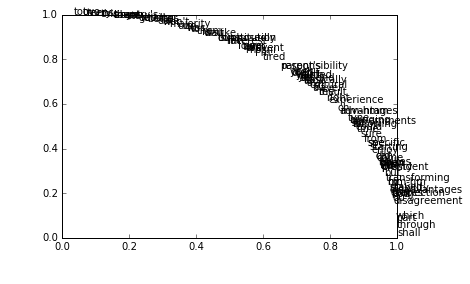

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word in pt.words:
    print(word, vectors[pt.word2int[word]][1])
    ax.annotate(word, (vectors[pt.word2int[word]][0],vectors[pt.word2int[word]][1] ))

plt.show()